In [16]:
import pandas as pd
import numpy as np

In [17]:
data=pd.read_csv('weatherAUS.csv')
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [18]:
data.shape

(145460, 23)

In [19]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

$ \huge{2.}$ \
\
The code is implemented below:

In [20]:
data=data[pd.isnull(data['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
data=data.fillna(data.mean())

# Create bands for variables that we want to use in the model
data['Temp9amcat']=data['Temp9am'].apply(lambda x: 'cat1'   if x<15 else
                                                            'cat2' if 15<=x<=26 else 'cat3')
data['Temp3pmcat']=data['Temp3pm'].apply(lambda x: 'cat1'   if x<24 else
                                                            'cat2' if 24<=x<=36 else 'cat3')
data['WindSpeed9amcat']=data['WindSpeed9am'].apply(lambda x: 'cat1' if x<16 else 'cat2')
data['WindSpeed3pmcat']=data['WindSpeed3pm'].apply(lambda x: 'cat1' if x<15 else 'cat2')
# Show a snaphsot of data
data

<ipython-input-20-f77d3b346361>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data=data.fillna(data.mean())


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6     5.469824   
1       2008-12-02   Albury      7.4     25.1       0.0     5.469824   
2       2008-12-03   Albury     12.9     25.7       0.0     5.469824   
3       2008-12-04   Albury      9.2     28.0       0.0     5.469824   
4       2008-12-05   Albury     17.5     32.3       1.0     5.469824   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0     5.469824   
145455  2017-06-21    Uluru      2.8     23.4       0.0     5.469824   
145456  2017-06-22    Uluru      3.6     25.3       0.0     5.469824   
145457  2017-06-23    Uluru      5.4     26.9       0.0     5.469824   
145458  2017-06-24    Uluru      7.8     27.0       0.0     5.469824   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  Cloud9am  \
0       7.624853           W           44.0          W  ...  8.000000   
1       7.624853         WNW           44.0        NNW  ...  4.437189   
2       7.624853         WSW           46.0          W  ...  4.437189   
3       7.624853          NE           24.0         SE  ...  4.437189   
4       7.624853           W           41.0        ENE  ...  7.000000   
...          ...         ...            ...        ...  ...       ...   
145454  7.624853           E           31.0        ESE  ...  4.437189   
145455  7.624853           E           31.0         SE  ...  4.437189   
145456  7.624853         NNW           22.0         SE  ...  4.437189   
145457  7.624853           N           37.0         SE  ...  4.437189   
145458  7.624853          SE           28.0        SSE  ...  3.000000   

        Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Temp9amcat  \
0       4.503167     16.9     21.8         No            No        cat2   
1       4.503167     17.2     24.3         No            No        cat2   
2       2.000000     21.0     23.2         No            No        cat2   
3       4.503167     18.1     26.5         No            No        cat2   
4       8.000000     17.8     29.7         No            No        cat2   
...          ...      ...      ...        ...           ...         ...   
145454  4.503167      9.4     20.9         No            No        cat1   
145455  4.503167     10.1     22.4         No            No        cat1   
145456  4.503167     10.9     24.5         No            No        cat1   
145457  4.503167     12.5     26.1         No            No        cat1   
145458  2.000000     15.1     26.0         No            No        cat2   

        Temp3pmcat  WindSpeed9amcat  WindSpeed3pmcat  
0             cat1             cat2             cat2  
1             cat2             cat1             cat2  
2             cat1             cat2             cat2  
3             cat2             cat1             cat1  
4             cat2             cat1             cat2  
...            ...              ...              ...  
145454        cat1             cat1             cat1  
145455        cat1             cat1             cat1  
145456        cat2             cat1             cat1  
145457        cat2             cat1             cat1  
145458        cat2             cat1             cat1  

[142193 rows x 27 columns]

In [21]:
data.isna().sum()

Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation            0
Sunshine               0
WindGustDir         9330
WindGustSpeed          0
WindDir9am         10013
WindDir3pm          3778
WindSpeed9am           0
WindSpeed3pm           0
Humidity9am            0
Humidity3pm            0
Pressure9am            0
Pressure3pm            0
Cloud9am               0
Cloud3pm               0
Temp9am                0
Temp3pm                0
RainToday           1406
RainTomorrow           0
Temp9amcat             0
Temp3pmcat             0
WindSpeed9amcat        0
WindSpeed3pmcat        0
dtype: int64

In [10]:
!pip install pybbn
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pybbn: filename=pybbn-3.2.3-py3-none-any.whl size=40391 sha256=92efca21aab97b3012a7f1a4057f10a2f16ba6b3d54158afaabdf7e77e4052e5
  Stored in directory: /root/.cache/pip/wheels/52/aa/29/604a0a26abba1522c308e6bae4a61f3b29f85240b50843d604
Successfully built pybbn


In [22]:
data['Temp9amcat'].value_counts(normalize=True).sort_index()
# print(type(data['Temp9am'].value_counts().sort_index()))
# ccat1, ccat2, ccat3
# for val in data['Temp9am']:))
# ccat1, ccat2, ccat3
# for val in data['Temp9am']:

cat1    0.397333
cat2    0.507866
cat3    0.094801
Name: Temp9amcat, dtype: float64

In [23]:
data['Temp3pmcat'].value_counts(normalize=True).sort_index()

cat1    0.648858
cat2    0.326676
cat3    0.024467
Name: Temp3pmcat, dtype: float64

In [24]:
data['WindSpeed9amcat'].value_counts(normalize=True).sort_index()

cat1    0.622626
cat2    0.377374
Name: WindSpeed9amcat, dtype: float64

In [25]:
data['WindSpeed3pmcat'].value_counts(normalize=True).sort_index()

cat1    0.320951
cat2    0.679049
Name: WindSpeed3pmcat, dtype: float64

In [26]:
# data['RainTomorrow'].value_counts(normalize=True).sort_index()

In [27]:
# # Create nodes by manually typing in probabilities
# T9am = BbnNode(Variable(0, 'T9am', ['cat1', 'cat2','cat3']), [0.397333, 0.507866, 0.094801])
# T3pm = BbnNode(Variable(1, 'T3pm', ['cat1', 'cat2','cat3']), [0.648858, 0.351107, 0.000035])
# W9am = BbnNode(Variable(2, 'W9am', ['cat1', 'cat2']), [0.622626, 0.377374])
# W3pm = BbnNode(Variable(3, 'W3pm', ['cat1', 'cat2']), [0.320951, 0.679049])
# RT = BbnNode(Variable(4, 'RT', ['No', 'Yes']), [0.92314, 0.07686, 
#                                                 0.89072, 0.10928, 
#                                                 0.76008, 0.23992, 
#                                                 0.64250, 0.35750, 
#                                                 0.49168, 0.50832, 
#                                                 0.32182, 0.67818])

In [28]:
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob  


In [29]:
T9am = BbnNode(Variable(0, 'T9am', ['cat1', 'cat2','cat3']), probs(data, child='Temp9amcat'))
T3pm = BbnNode(Variable(1, 'T3pm', ['cat1', 'cat2','cat3']), probs(data, child='Temp3pmcat', parent1='Temp9amcat'))
W9am = BbnNode(Variable(2, 'W9am', ['cat1', 'cat2']), probs(data, child='WindSpeed9amcat'))
W3pm = BbnNode(Variable(3, 'W3pm', ['cat1', 'cat2']), probs(data, child='WindSpeed3pmcat',parent1 = 'WindSpeed9amcat'))

RT = BbnNode(Variable(4, 'RT', ['No', 'Yes']), probs(data, child='RainTomorrow', parent1='Temp3pmcat', parent2='WindSpeed3pmcat'))

# Create Network
bbn = Bbn() \
    .add_node(T9am) \
    .add_node(T3pm) \
    .add_node(W9am) \
    .add_node(W3pm) \
    .add_node(RT) \
    .add_edge(Edge(T9am, T3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(T3pm, RT, EdgeType.DIRECTED)) \
    .add_edge(Edge(W9am, W3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(W3pm, RT, EdgeType.DIRECTED))

# print(type(bbn))

# Convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

$ \huge{3.}$

In [30]:
import networkx as nx # for drawing graphs
import matplotlib.pyplot as plt # for drawing graphs

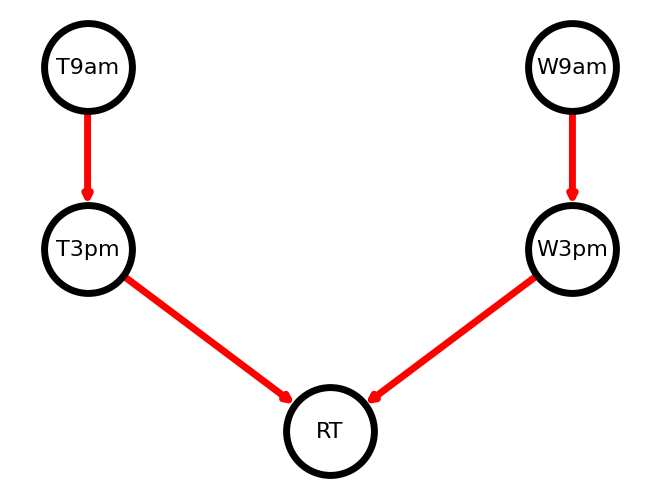

In [31]:
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 2), 3:(1, 0.5), 4: (0, -1)}

# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,}
    
# Generate graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

In [32]:
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
# Use the above function to print marginal probabilities
print_probs()

Node: 3|W3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|W9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|0.64886
1=cat2|0.32668
1=cat3|0.02447
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|0.39733
0=cat2|0.50787
0=cat3|0.09480
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.77556
4=Yes|0.22444
----------------


$ \huge{5.}$ \
\
Let us consider the threshold to be**$0.5$**, i.e., if the probability of **$Yes > 0.5$**, then it will rain according to our model, otherwise not.

In [33]:
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
# Use above function to add evidence
evidence('ev1', 'T9am', 'cat3', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|W9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|0.05267
1=cat2|0.74013
1=cat3|0.20720
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|0.00000
0=cat2|0.00000
0=cat3|1.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.85703
4=Yes|0.14297
----------------


**$P(No)>0.5$**, which means it **does not rain**.

In [34]:
evidence('ev2', 'T9am', 'cat1', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|W9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|0.97522
1=cat2|0.02476
1=cat3|0.00002
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|1.00000
0=cat2|0.00000
0=cat3|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.73665
4=Yes|0.26335
----------------


**$P(No)>0.5$**, which means it **does not rain**.

In [35]:
evidence('ev3', 'T3pm', 'cat2', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|W9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|0.00000
1=cat2|1.00000
1=cat3|0.00000
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|1.00000
0=cat2|0.00000
0=cat3|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.84743
4=Yes|0.15257
----------------


**$P(No)>0.5$**, which means it **does not rain**.

In [36]:
evidence('ev4', 'T3pm', 'cat1', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|W9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|1.00000
1=cat2|0.00000
1=cat3|0.00000
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|1.00000
0=cat2|0.00000
0=cat3|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.73383
4=Yes|0.26617
----------------


**$P(No)>0.5$**, which means it **does not rain**.

In [37]:
evidence('ev5', 'T9am', 'cat1', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|W9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|1.00000
1=cat2|0.00000
1=cat3|0.00000
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|0.59718
0=cat2|0.39512
0=cat3|0.00770
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.73383
4=Yes|0.26617
----------------


**$P(No)>0.5$**, which means it **does not rain**.

In [38]:
evidence('ev6', 'T3pm', 'cat1', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|W3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|W9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|0.64886
1=cat2|0.32668
1=cat3|0.02447
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|0.39733
0=cat2|0.50787
0=cat3|0.09480
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.77556
4=Yes|0.22444
----------------


**$P(No)>0.5$**, which means it **does not rain**.